In [28]:
# =========================================================
# 🩺 Diabetes Prediction using Decision Tree and Random Forest
# =========================================================
# Author: Akshay Jadiya
# Date: October 2025
# =========================================================


In [29]:
# --- Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import joblib

# --- Plot Style ---
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
pd.set_option('display.max_columns', None)


In [30]:
# =========================================================
# 📥 Step 1: Load Dataset
# =========================================================
df = pd.read_csv("diabetes.csv")   # Ensure the CSV is in same folder
print("✅ Dataset loaded successfully!")
display(df.head())


✅ Dataset loaded successfully!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
# =========================================================
# 📊 Step 2: Exploratory Data Analysis (EDA)
# =========================================================
print("\nDataset Info:")
print(df.info())






Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [32]:
print("\nMissing Values per Column:")
print(df.isnull().sum())




Missing Values per Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [33]:
print("\nDescriptive Statistics:")
display(df.describe())




Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\aksha\AppData\Local\Temp\ipykernel_12540\536371008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='cool')


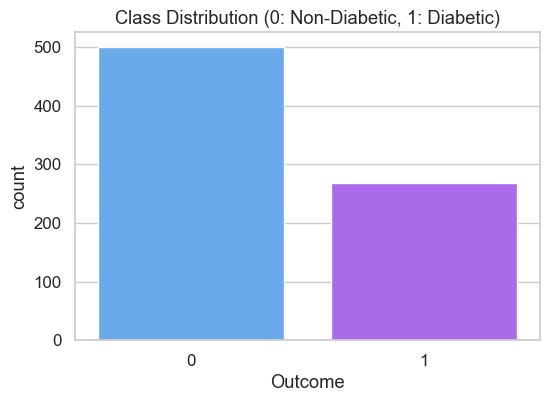

In [34]:
# --- Target Class Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette='cool')
plt.title("Class Distribution (0: Non-Diabetic, 1: Diabetic)")
plt.show()



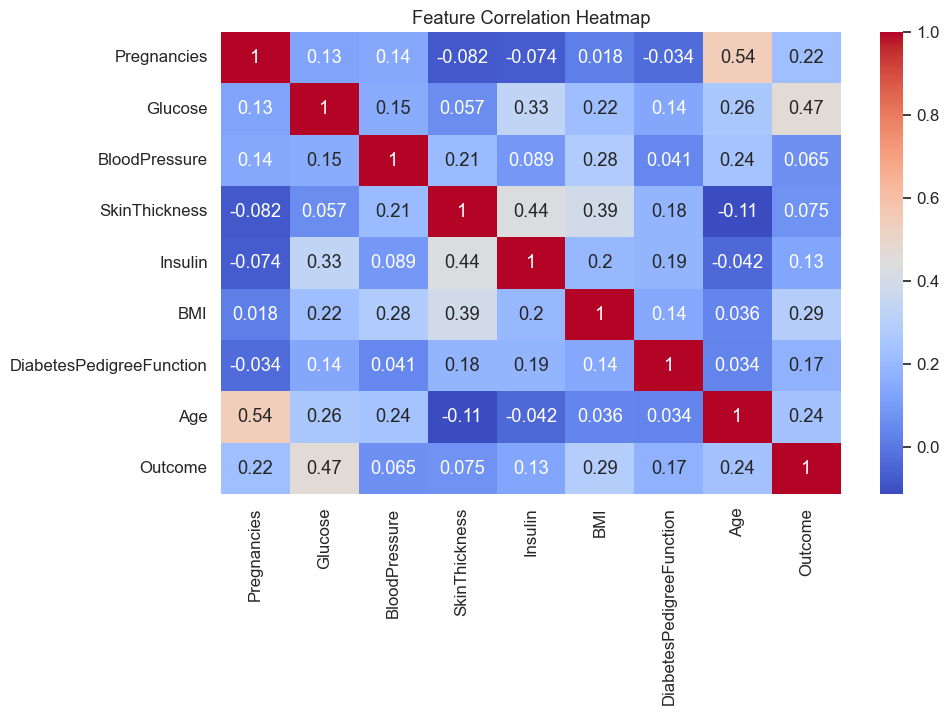

In [35]:
# --- Correlation Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:
# =========================================================
# ⚙️ Step 3: Data Preprocessing
# =========================================================
X = df.drop("Outcome", axis=1)
y = df["Outcome"]



In [37]:
# --- Apply Min-Max Scaling ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled using MinMaxScaler")



✅ Features scaled using MinMaxScaler


In [38]:
# --- Split into Train/Test ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 614, Testing Samples: 154


In [39]:
# =========================================================
# 🌳 Step 4: Decision Tree Classifier
# =========================================================
dt = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini')
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"🎯 Decision Tree Accuracy: {acc_dt*100:.2f}%")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))



🎯 Decision Tree Accuracy: 79.22%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



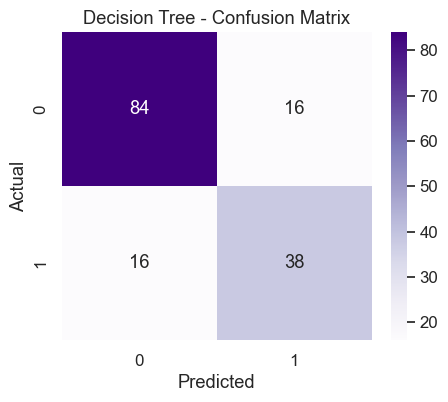

In [40]:
# --- Confusion Matrix ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



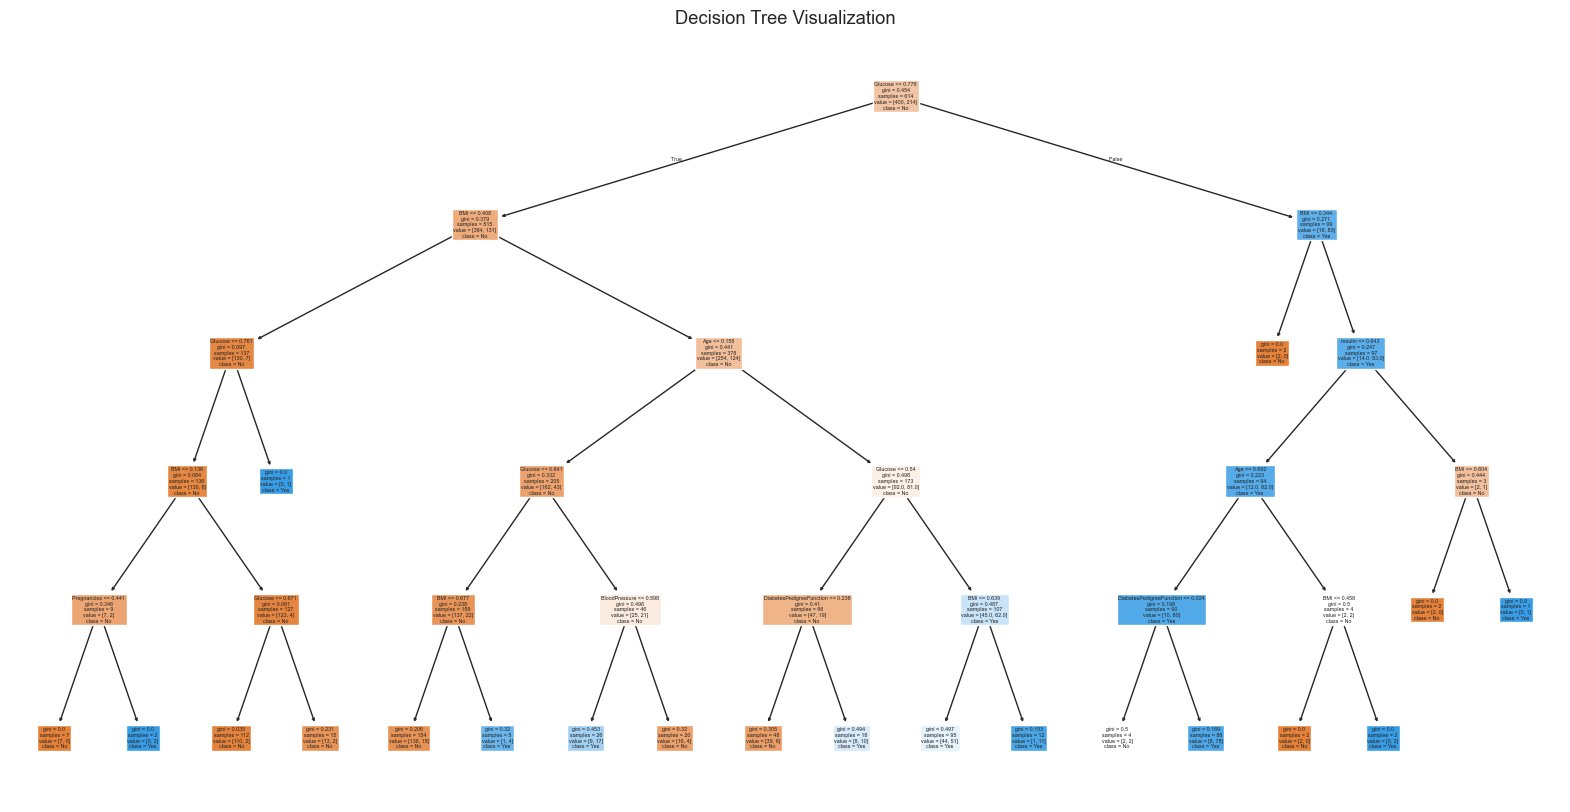

In [41]:
# --- Visualize the Decision Tree ---
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=df.columns[:-1], class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()



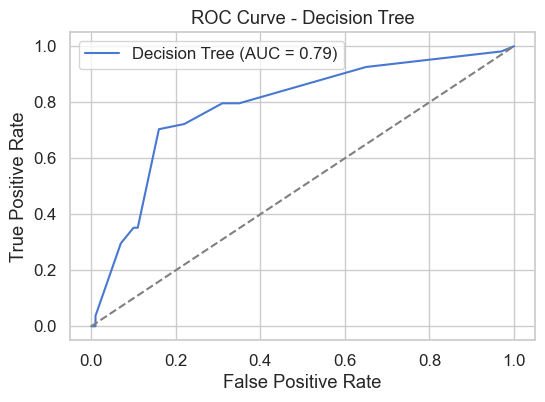

In [42]:
# --- ROC Curve for Decision Tree ---
y_prob_dt = dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


In [43]:
# =========================================================
# 🌲 Step 5: Random Forest Classifier with GridSearchCV
# =========================================================
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

print("\n✅ Best Parameters for Random Forest:")
print(grid_search.best_params_)

rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

y_pred_rf = rf_best.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"🎯 Random Forest Accuracy: {acc_rf*100:.2f}%")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Fitting 5 folds for each of 36 candidates, totalling 180 fits

✅ Best Parameters for Random Forest:
{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
🎯 Random Forest Accuracy: 73.38%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



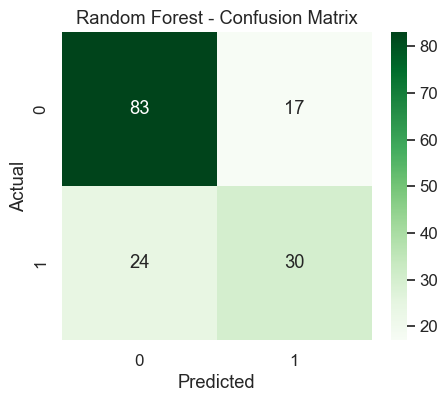

In [44]:
# --- Confusion Matrix ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



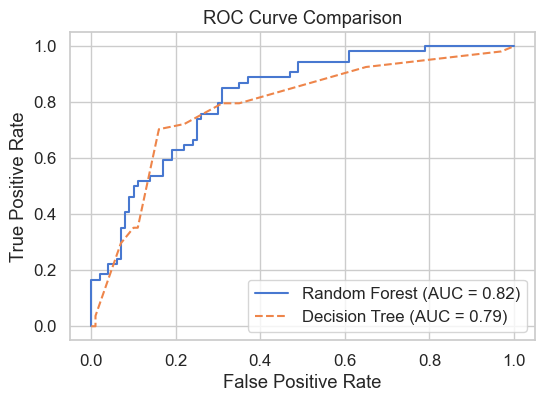

In [45]:
# --- ROC Curve for Random Forest ---
y_prob_rf = rf_best.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_dt, tpr_dt, linestyle="--", label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()



C:\Users\aksha\AppData\Local\Temp\ipykernel_12540\1721063807.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette="cool")


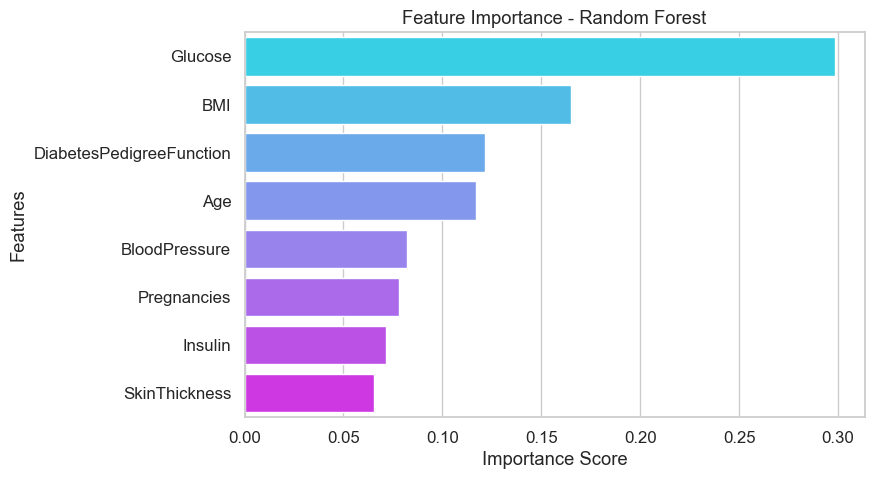


Top 5 Important Features:
Glucose                     0.298490
BMI                         0.165154
DiabetesPedigreeFunction    0.121609
Age                         0.116907
BloodPressure               0.082131
dtype: float64


In [46]:
# =========================================================
# 📊 Step 6: Feature Importance (Random Forest)
# =========================================================
feature_imp = pd.Series(rf_best.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="cool")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

print("\nTop 5 Important Features:")
print(feature_imp.head())


In [47]:
# =========================================================
# 💾 Step 7: Save Model
# =========================================================
joblib.dump(rf_best, "rf_model.pkl")
joblib.dump(dt, "dt_model.pkl")
print("\n✅ Models saved successfully: rf_model.pkl and dt_model.pkl")



✅ Models saved successfully: rf_model.pkl and dt_model.pkl



📊 Model Performance Summary


,Model,Accuracy,AUC Score
0,Decision Tree,0.792208,0.785833
1,Random Forest,0.733766,0.817407


C:\Users\aksha\AppData\Local\Temp\ipykernel_12540\3518586581.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="Model", y="Accuracy", palette="viridis")


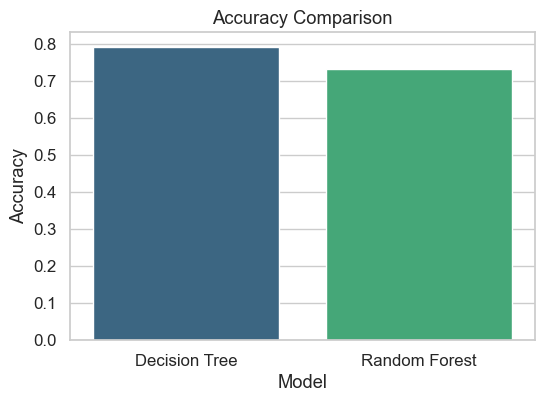

In [48]:
# =========================================================
# 🧠 Step 8: Model Comparison Summary
# =========================================================
print("\n📊 Model Performance Summary")
summary = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [acc_dt, acc_rf],
    "AUC Score": [roc_auc_dt, roc_auc_rf]
})
display(summary)

plt.figure(figsize=(6,4))
sns.barplot(data=summary, x="Model", y="Accuracy", palette="viridis")
plt.title("Accuracy Comparison")
plt.show()



In [49]:
# =========================================================
# 🎯 Conclusion
# =========================================================
print("""
✅ Decision Tree offers simplicity and interpretability.
✅ Random Forest achieves higher accuracy and generalization.
✅ Key features influencing diabetes prediction: Glucose, BMI, Age, and Insulin.
✅ Both models ready for deployment or further optimization.
""")



✅ Decision Tree offers simplicity and interpretability.
✅ Random Forest achieves higher accuracy and generalization.
✅ Key features influencing diabetes prediction: Glucose, BMI, Age, and Insulin.
✅ Both models ready for deployment or further optimization.

